## Step1: Change Color encoding to understandable format
### Negative:-1 Inconclusive:-2

In [1]:
"""
function myFunction() {
  var ss = SpreadsheetApp.getActiveSpreadsheet();
  var sheet = ss.getSheets()[0];
  var range = sheet.getRange("D4:BE72");
  var cells = range.getValues();
  var numRows = range.getNumRows();
  var numCols = range.getNumColumns();
  Logger.log(sheet.getRange(4,8).getBackground());
  for (var i = 0; i < numRows; i++) {
    for (var j = 0; j < numCols; j++) {
      if (sheet.getRange(4+i,4+j).getBackground() === "#6aa84f"){
        cells[i][j] = -1;
      }
      if (sheet.getRange(4+i,4+j).getBackground() === "#ffffff"){
        cells[i][j] = -2;
      }
    }
  }
  range.setValues(cells);
}
myFunction();
"""

'\nfunction myFunction() {\n  var ss = SpreadsheetApp.getActiveSpreadsheet();\n  var sheet = ss.getSheets()[0];\n  var range = sheet.getRange("D4:BE72");\n  var cells = range.getValues();\n  var numRows = range.getNumRows();\n  var numCols = range.getNumColumns();\n  Logger.log(sheet.getRange(4,8).getBackground());\n  for (var i = 0; i < numRows; i++) {\n    for (var j = 0; j < numCols; j++) {\n      if (sheet.getRange(4+i,4+j).getBackground() === "#6aa84f"){\n        cells[i][j] = -1;\n      }\n      if (sheet.getRange(4+i,4+j).getBackground() === "#ffffff"){\n        cells[i][j] = -2;\n      }\n    }\n  }\n  range.setValues(cells);\n}\nmyFunction();\n'

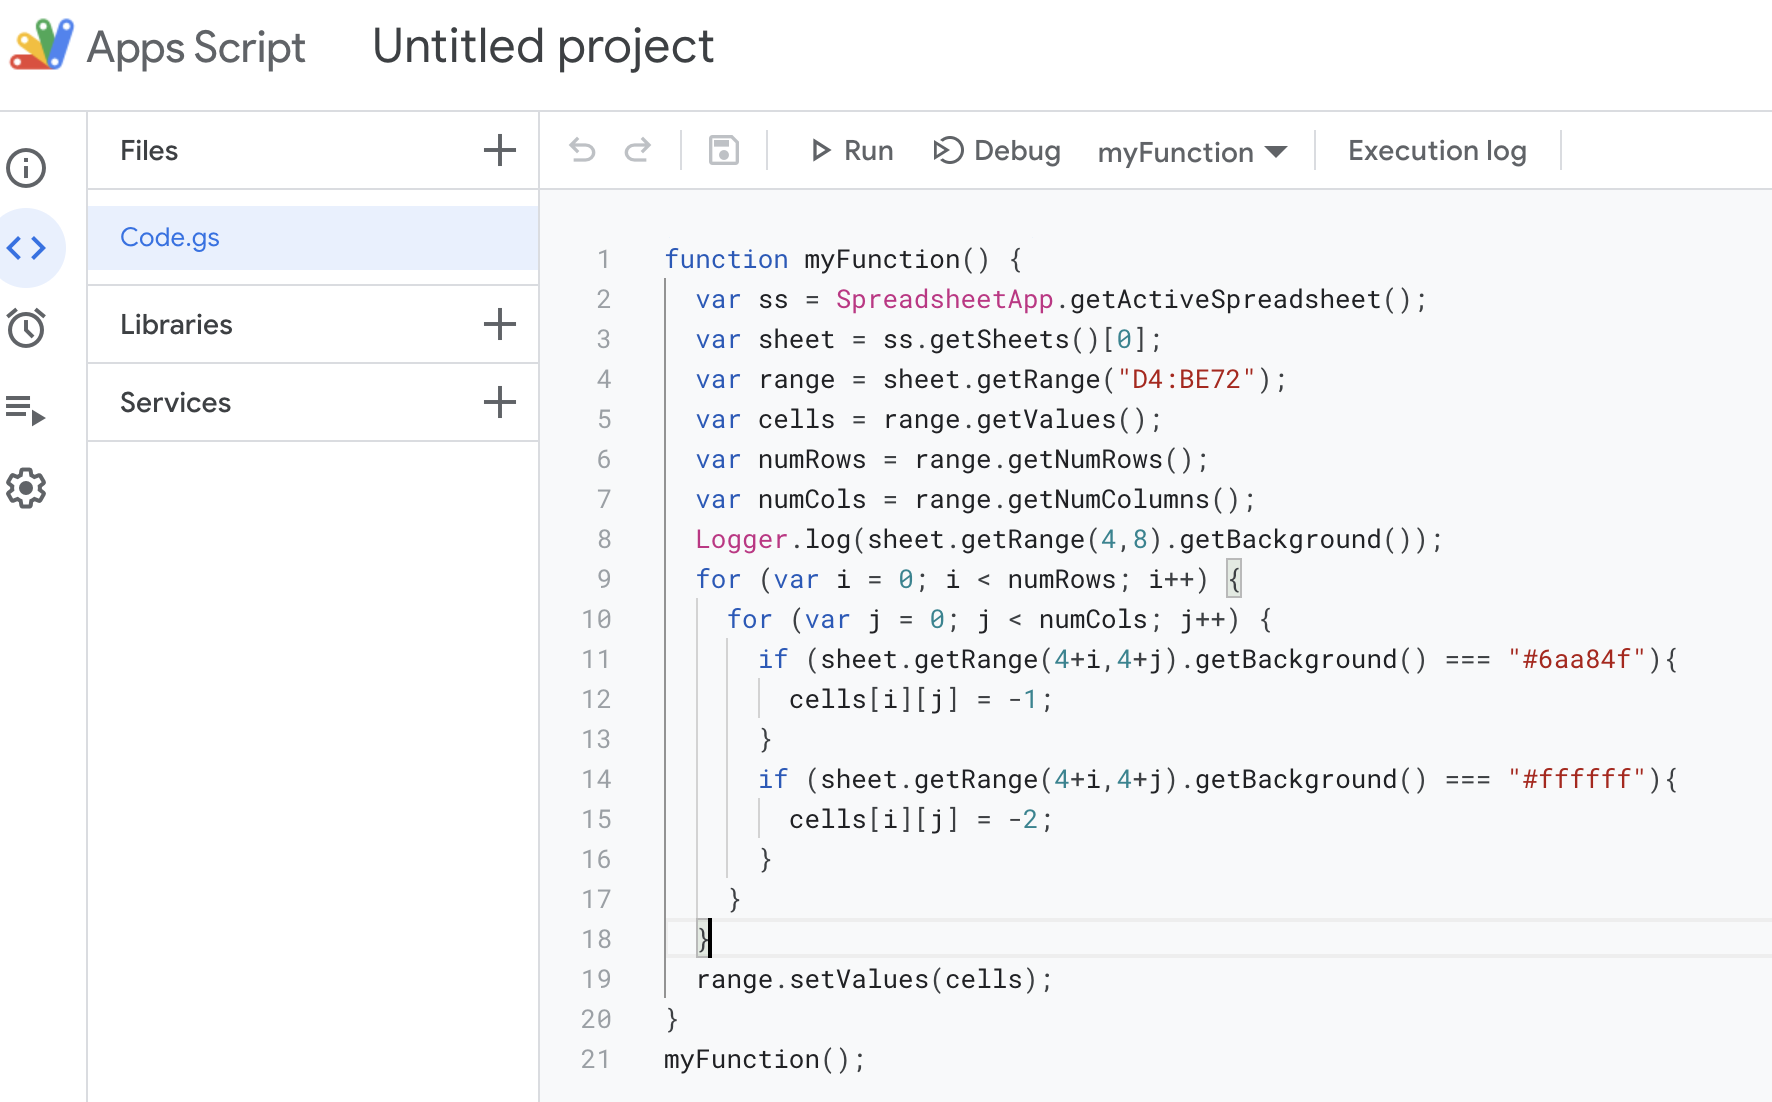

## Step2: Reformat Data

In [2]:
!pip install gspread oauth2client df2gspread

You are using pip version 19.0.1, however version 21.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd 
import gspread 
from oauth2client.service_account import ServiceAccountCredentials
from pandas.io.json import json_normalize

In [2]:
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('./fifth-tangent-301922-e9b71e669448.json', scope)
gc = gspread.authorize(credentials)

In [3]:
spreadsheet_key = '1mKOeKWf8f_mUmxbDQeHMA-P6lk6SfZf4Q9CRBH44EHU'
book = gc.open_by_key(spreadsheet_key)
worksheet = book.worksheet("Results_for_test")
table = worksheet.get_all_values()

In [4]:
df = pd.DataFrame(table[3:], columns=table[2])
df.head()

,SampleID,ManholeID,Building(s),11/23,11/24,11/25,11/26,11/27,11/28,11/29,...,1/26,1/27,1/28,1/29,1/30,1/31,2/1,2/2,2/3,2/4
0,AS009,C1M031,"Blake, Argo, Urey",-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,,,-1,37.277,34.998,-1,-1,,-1,-1
1,AS010,C1M057,Tamarack - Muir APT,-1.000,34.159,29.311,30.418,28.506,33.628,34.414,...,,-1,35.798,35.18,35.709,32.195,35.802,,32.217,37.192
2,AS064,C1M059,Tuolumne - Muir APT,37.675,-1.000,-1.000,-1.000,-2.000,-1.000,-2.000,...,,34.382,34.834,32.49,34.754,37.209,-1,,35.456,34.137
3,AS014,C1M060,Tenaya - Muir RH,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,,-1,33.618,34.84,35.465,34.496,-1,,-1,36.743
4,AS012,C2M015,Rita Atkinson Residences,36.902,-2.000,32.854,33.021,33.895,35.072,-2.000,...,,-1,34.13,27.643,26.617,,,,-1,35.343


In [6]:
from datetime import datetime
date_time_obj = datetime.strptime("2/4/21", "%m/%d/%y")
local_time = date_time_obj.astimezone()
local_time.isoformat()

'2021-02-04T00:00:00-08:00'

In [8]:
df.head(10)

,SampleID,ManholeID,Building(s),11/23,11/24,11/25,11/26,11/27,11/28,11/29,...,1/26,1/27,1/28,1/29,1/30,1/31,2/1,2/2,2/3,2/4
0,AS009,C1M031,"Blake, Argo, Urey",-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,,,-1,38.601,,,,,,
1,AS010,C1M057,Tamarack - Muir APT,-1.000,34.159,29.311,30.418,28.506,33.628,34.414,...,,-1,35.798,-1,,,,,,
2,AS064,C1M059,Tuolumne - Muir APT,37.675,-1.000,-1.000,-1.000,-2.000,-1.000,-2.000,...,,34.382,34.834,-37.891,,,,,,
3,AS014,C1M060,Tenaya - Muir RH,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,,-1,33.618,31.328,,,,,,
4,AS012,C2M015,Rita Atkinson Residences,36.902,-2.000,32.854,33.021,33.895,35.072,-2.000,...,,-1,34.13,-35.311,,,,,,
5,AS051,C3M039,Camp Snoopy,-2.000,-1.000,-1.000,-1.000,-2.000,-2.000,-2.000,...,,,-1,-1,,,,,,
6,AS052,C3M041,Camp Snoopy,-1.000,-1.000,-1.000,-1.000,-1.000,-2.000,-2.000,...,,37.201,-1,37.065,,,,,,
7,AS053,C3M042,Camp Snoopy,-1.000,-2.000,-1.000,-2.000,-1.000,-1.000,-1.000,...,,,-1,,,,,,,
8,AS029,C3M149,Marshall:Lower and Upper,-2.000,-1.000,34.260,33.552,35.353,-2.000,-2.000,...,,-1,-1,-38.848,,,,,,
9,AS061,C3M150,Marshall:Lower and Upper,-1.000,-1.000,-1.000,-2.000,-2.000,-2.000,-1.000,...,,-1,-38.446,-39.182,,,,,,


## Calculate Stats

### Positive Count

In [9]:
df_raw_data = df.drop(["SampleID","ManholeID","Building(s)"],axis=1)
df_raw_data = df_raw_data.drop(df.tail(1).index)
df_raw_data.head()
df_raw_data = df_raw_data.fillna(0)
df_raw_data = df_raw_data.replace("",0)
df_raw_data = df_raw_data.replace("ND",0)
df_raw_data = df_raw_data.astype(float)

In [10]:
df_raw_data.head()

,11/23,11/24,11/25,11/26,11/27,11/28,11/29,11/30,12/1,12/2,...,1/26,1/27,1/28,1/29,1/30,1/31,2/1,2/2,2/3,2/4
0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,0.0,0.000,-1.000,38.601,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.000,34.159,29.311,30.418,28.506,33.628,34.414,34.997,33.160,33.545,...,0.0,-1.000,35.798,-1.000,0.0,0.0,0.0,0.0,0.0,0.0
2,37.675,-1.000,-1.000,-1.000,-2.000,-1.000,-2.000,-2.000,35.920,34.290,...,0.0,34.382,34.834,-37.891,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,37.080,...,0.0,-1.000,33.618,31.328,0.0,0.0,0.0,0.0,0.0,0.0
4,36.902,-2.000,32.854,33.021,33.895,35.072,-2.000,-2.000,35.074,31.044,...,0.0,-1.000,34.130,-35.311,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_raw_data["11/23"][df_raw_data["11/23"]>0]

2     37.675
4     36.902
24    36.902
25    30.690
26    28.108
40    37.147
41    37.885
42    35.816
50    38.711
54    34.261
Name: 11/23, dtype: float64

In [12]:
positive_count = (df_raw_data>0).sum(axis=0)
positive_count

11/23    10
11/24     7
11/25    10
11/26     8
11/27    11
11/28    12
11/29    11
11/30    13
12/1     18
12/2     24
12/3     21
12/4     24
12/5     18
12/6     18
12/7     20
12/8     16
12/9     17
12/10    19
12/11    18
12/12    19
12/13    18
12/14    23
12/15    20
12/16    26
12/17    15
12/18    17
12/19    19
12/20    18
12/21    15
12/22    22
         ..
1/6      42
1/7      29
1/8      33
1/9      41
1/10     36
1/11     38
1/12     35
1/13     35
1/14     37
1/15     34
1/16      0
1/17      0
1/18      0
1/19      2
1/20     22
1/21      0
1/22      8
1/23      9
1/24     14
1/25     10
1/26      0
1/27     19
1/28     22
1/29     25
1/30      0
1/31      0
2/1       0
2/2       0
2/3       0
2/4       0
Length: 74, dtype: int64

## Grading Automation

In [13]:
"""
grading algo:
no sample => check the color coded sheet with platemap and see whether the sampler in the platemap is included
>= 2 positive => report positive if there is a value for gene1, if not with lowest non zero data
<1

>= 2 positive then:
    - report as positive
    - report gene 1 if there is a value
    - otherwise report the lowest nonzero value for gene 2 or gene 3
If 1 positive then:
    - report as inconclusive
    - report the value of whichever gene was nonzero
If all 3 are negative then:
    - report as negative
    Remember that values >= 40 count as zero
"""

'\ngrading algo:\nno sample => check the color coded sheet with platemap and see whether the sampler in the platemap is included\n>= 2 positive => report positive if there is a value for gene1, if not with lowest non zero data\n<1\n\n>= 2 positive then:\n    - report as positive\n    - report gene 1 if there is a value\n    - otherwise report the lowest nonzero value for gene 2 or gene 3\nIf 1 positive then:\n    - report as inconclusive\n    - report the value of whichever gene was nonzero\nIf all 3 are negative then:\n    - report as negative\n    Remember that values >= 40 count as zero\n'

In [14]:
import numpy as np
np.array([1,2,3])[((np.array([1,2,3])>0) & (np.array([1,2,3]) <3))]

array([1, 2])

In [15]:
all_sample_ids = set(df['SampleID'])
def case_classification(target_vals):
    pos_cnt = ((target_vals>0) & (target_vals <40)).sum()
    sign,val = "negative",0
    if pos_cnt >= 2:
        sign = "positive"
        val = target_vals[0] if target_vals[0] > 0 else min(target_vals[1:])
    elif pos_cnt == 1:
        sign = "inconclusive"
        val = target_vals[(target_vals>0) & (target_vals <40)][0]
    return sign,val
    

In [16]:
def case_classification_single(target_vals):
    pos_cnt = ((target_vals>0) & (target_vals <40)).sum()
    val = -1
    if pos_cnt >= 2:
        val = target_vals[0] if target_vals[0] > 0 else min(target_vals[1:])
    elif pos_cnt == 1:
        val = -target_vals[(target_vals>0) & (target_vals <40)][0]
    return round(val,3)

In [17]:
cq_output = pd.read_csv("JAN07_Cq_output.csv",names=["well1","gene1","well2","gene2","well3","gene3","sampleID","cqValues"])
cq_output

,well1,gene1,well2,gene2,well3,gene3,sampleID,cqValues
0,A01,0.000000,A02,42.767600,B01,0.000000,1.7.AS054,0.000000
1,C01,37.483387,C02,0.000000,D01,0.000000,1.7.AS009,37.483387
2,E01,33.407938,E02,34.727107,F01,33.760715,1.7.AS077,33.407938
3,G01,30.459582,G02,34.829199,H01,31.476371,1.7.AS076,30.459582
4,I01,0.000000,I02,0.000000,J01,0.000000,1.7.AS056,0.000000
5,K01,36.044430,K02,39.552923,L01,35.186184,1.7.AS079,36.044430
6,M01,0.000000,M02,44.777985,N01,0.000000,1.7.AS055,0.000000
7,O01,36.546057,O02,0.000000,P01,38.141637,1.7.AS075,36.546057
8,A03,32.691472,A04,35.023437,B03,32.413013,1.7.AS022,32.691472
9,C03,37.337127,C04,38.183617,D03,35.128188,1.7.AS034,37.337127


In [18]:
cq_output[cq_output['sampleID']=='1.7.AS074']

,well1,gene1,well2,gene2,well3,gene3,sampleID,cqValues
41,C11,36.237658,C12,40.048714,D11,34.501473,1.7.AS074,36.237658


In [19]:
cq_output['classification'] = cq_output.apply(lambda x: case_classification(np.array([x["gene1"],x["gene2"],x["gene3"]])), axis=1)

In [20]:
from collections import defaultdict 
cq_output['sampleID_serial'] = cq_output.apply(lambda x:x['sampleID'].split(".")[-1],axis=1)
sample_class_mapping = dict(zip(cq_output.sampleID_serial,cq_output.classification))

In [21]:
wasterwater_sheet = df[["SampleID","1/7"]]
wasterwater_sheet["auto_grade"] = wasterwater_sheet.apply(lambda x:sample_class_mapping.get(x['SampleID'],'no sample'),axis=1)

/Users/yijianzong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
wasterwater_sheet

,SampleID,1/7,auto_grade
0,AS009,-37.483,"(inconclusive, 37.48338697)"
1,AS010,31.098,"(positive, 31.09814111)"
2,AS064,-38.391,"(inconclusive, 38.391259600000005)"
3,AS014,-38.888,"(inconclusive, 38.88841883)"
4,AS012,-2,no sample
5,AS051,-1,"(negative, 0)"
6,AS052,-1,"(negative, 0)"
7,AS053,-2.000,no sample
8,AS029,-36.546,"(inconclusive, 36.54629225)"
9,AS061,-2,no sample


In [23]:
! python ../src/data/python_excelparse.py ./JAN07RTL.csv  ./JAN07RTL_out.csv

In [24]:
cq_output.head()

,well1,gene1,well2,gene2,well3,gene3,sampleID,cqValues,classification,sampleID_serial
0,A01,0.000000,A02,42.767600,B01,0.000000,1.7.AS054,0.000000,"(negative, 0)",AS054
1,C01,37.483387,C02,0.000000,D01,0.000000,1.7.AS009,37.483387,"(inconclusive, 37.48338697)",AS009
2,E01,33.407938,E02,34.727107,F01,33.760715,1.7.AS077,33.407938,"(positive, 33.40793815)",AS077
3,G01,30.459582,G02,34.829199,H01,31.476371,1.7.AS076,30.459582,"(positive, 30.45958226)",AS076
4,I01,0.000000,I02,0.000000,J01,0.000000,1.7.AS056,0.000000,"(negative, 0)",AS056


In [25]:
spreadsheet_key = '1B6QFxRnrqheFIrttHnnR85cgdfE06_lbiWDgWqbO560'
book = gc.open_by_key(spreadsheet_key)
worksheet = book.worksheet("platemap")
table = worksheet.get_all_values()


In [26]:
def plateByDate(date,sites_cnt):
    select_date_map = [(elem,index) for index,elem in enumerate(table) if elem[0]==date]
    return table[select_date_map[0][1]:select_date_map[0][1]+sites_cnt+1]

In [31]:
# assumption: date is the unqiue, e.g. there won't be 12/15/20 in the style sheet other than the date
plate_df = pd.DataFrame(plateByDate('1/29/21',9)).drop(0,axis=0)
plate_df = plate_df.replace("",np.nan)

In [32]:
plate_df = plate_df.dropna(how='all')
plate_df = plate_df.dropna(how='all',axis=1)

In [33]:
plate_df[plate_df.columns[1:]]

,1,2,3,4,5,6,7,8,9,10,11,12,14,15
1,1,2,3,4,5,6,7,8,9,10,11,12,NaN,NaN
2,1.29.SD334,1.29.SD399,1.29.AS075,1.29.AS078,1.29.AS020,1.29.AS016,1.29.AS085,1.29.AS042,1.29.AS044,1.29.AS031,1.29.AS108,A1,1.29.SD334,St Rose
3,1.29.SD259,1.29.AS061,1.29.AS089,1.29.AS088,1.29.AS002,1.29.AS018,1.29.AS087,1.29.AS066,1.29.AS034,1.29.AS005,1.29.AS107,A2,1.29.SD259,Sunset
4,1.29.SD294,1.29.AS029,1.29.AS090,1.29.AS010,1.29.AS021,1.29.AS012,1.29.AS059,1.29.AS038,1.29.AS008,1.29.AS024,NaN,A3,1.29.SD294,Smythe
5,1.29.SD262,1.29.AS095,1.29.AS077,1.29.AS064,1.29.AS013,1.29.AS086,1.29.AS083,1.29.AS080,1.29.AS030,1.29.AS106,NaN,A4,1.29.SD262,Charter
6,1.29.SD311,1.29.AS058,1.29.AS014,1.29.AS062,1.29.AS067,1.29.AS070,1.29.AS052,1.29.AS039,1.29.AS022,1.29.AS104,NaN,B1,1.29.SD311,Monte Vista
7,1.29.SD310,1.29.AS057,1.29.AS092,1.29.AS063,1.29.AS068,1.29.AS071,1.29.AS051,1.29.AS081,1.29.AS026,1.29.AS056,NaN,B2,1.29.SD310,Foothill Oak
8,1.29.SD335,1.29.AS060,1.29.AS009,1.29.AS098,1.29.AS017,1.29.AS072,1.29.AS048,1.29.AS037,1.29.AS028,1.29.AS054,NaN,B3,1.29.SD335,Lillian Rice
9,1.29.SD255,1.29.AS074,1.29.AS076,1.29.AS097,1.29.AS019,1.29.AS084,1.29.AS047,1.29.AS043,1.29.AS035,1.29.AS099,NaN,B4,1.29.SD255,Castle Park


In [30]:
flattened_plate = plate_df[plate_df.columns[1:]].values.T.flatten()
flattened_plate = [elem.split(".")[-1] for elem in flattened_plate if type(elem)==str]
flattened_plate

['AS054',
 'AS009',
 'AS077',
 'AS076',
 'AS056',
 'AS079',
 'AS055',
 'AS075',
 'AS022',
 'AS034',
 'AS008',
 'AS066',
 'AS067',
 'AS013',
 'AS019',
 'AS082',
 'AS044',
 'AS048',
 'AS081',
 'AS039',
 'AS047',
 'AS080',
 'AS023',
 'AS010',
 'AS002',
 'AS017',
 'AS016',
 'AS037',
 'AS042',
 'AS043',
 'AS046',
 'AS014',
 'AS015',
 'AS018',
 'AS028',
 'AS024',
 'AS064',
 'AS027',
 'AS052',
 'AS063',
 'AS062',
 'AS074',
 'AS070',
 'AS060',
 'AS058',
 'AS029',
 'AS057',
 'AS059',
 'AS072',
 'AS051',
 'AS071']

In [195]:
rtl_out = pd.read_csv("JAN07RTL_out.csv",names=["well1","gene1","well2","gene2","well3","gene3","sampleID","cqValues"],index_col=False)

In [196]:
rtl_out = rtl_out.assign(sampleID_serial='')
flattened_plate_series = pd.Series(flattened_plate, index=list(range(len(flattened_plate))))
rtl_out.sampleID_serial.update(other=flattened_plate_series)

In [197]:
rtl_out

,well1,gene1,well2,gene2,well3,gene3,sampleID,cqValues,sampleID_serial
0,A01,0.000000,A02,42.767600,B01,0.000000,B02,0,AS054
1,C01,37.483387,C02,0.000000,D01,0.000000,D02,0,AS009
2,E01,33.407938,E02,34.727107,F01,33.760715,F02,0,AS077
3,G01,30.459582,G02,34.829199,H01,31.476371,H02,0,AS076
4,I01,0.000000,I02,0.000000,J01,0.000000,J02,0,AS056
5,K01,36.044430,K02,39.552923,L01,35.186184,L02,0,AS079
6,M01,0.000000,M02,44.777985,N01,0.000000,N02,0,AS055
7,O01,36.546057,O02,0.000000,P01,38.141637,P02,0,AS075
8,A03,32.691472,A04,35.023437,B03,32.413013,B04,0,AS022
9,C03,37.337127,C04,38.183617,D03,35.128188,D04,0,AS034


In [218]:
rtl_out['classification'] = rtl_out.apply(lambda x: case_classification(np.array([x["gene1"],x["gene2"],x["gene3"]])), axis=1)
rtl_sample_class_mapping = dict(zip(rtl_out.sampleID_serial,rtl_out.classification))
rtl_wasterwater_sheet =  df[["SampleID","1/7"]]
rtl_wasterwater_sheet["auto_grade"] = rtl_wasterwater_sheet.apply(lambda x:rtl_sample_class_mapping.get(x['SampleID'],('no sample',0)),axis=1)
rtl_wasterwater_sheet



/Users/yijianzong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,SampleID,1/7,auto_grade
0,AS009,37.483,"(inconclusive, 37.48338697)"
1,AS010,31.098,"(positive, 31.09814111)"
2,AS064,38.391,"(inconclusive, 38.391259600000005)"
3,AS014,38.888,"(inconclusive, 38.88841883)"
4,AS012,-2,"(no sample, 0)"
5,AS051,-1.000,"(negative, 0)"
6,AS052,-1.000,"(negative, 0)"
7,AS053,-1.000,"(no sample, 0)"
8,AS029,36.546,"(inconclusive, 36.54629225)"
9,AS061,-2,"(no sample, 0)"


In [257]:
 df["1/7"]

0     37.483
1     31.098
2     38.391
3     38.888
4         -2
5     -1.000
6     -1.000
7     -1.000
8     36.546
9         -2
10    35.207
11    34.539
12    35.145
13    -1.000
14    37.056
15    34.501
16     37.19
17          
18    36.497
19        -2
20    37.388
21    -1.000
22    -1.000
23    37.759
24    -1.000
25    30.221
26    28.072
27          
28          
29    35.006
       ...  
41    36.479
42    33.493
43        -2
44    -1.000
45    34.512
46    35.586
47    34.456
48    33.539
49    32.878
50    32.413
51    37.337
52    -1.000
53        -2
54        -2
55    36.091
56     35.01
57        -2
58        -2
59    33.339
60        -2
61    -1.000
62    -1.000
63        -2
64    35.186
65    33.407
66    30.459
67    36.546
68    36.044
69          
70        66
Name: 1/7, Length: 71, dtype: object

In [243]:
rtl_out['classification_single'] = rtl_out.apply(lambda x: case_classification_single(np.array([x["gene1"],x["gene2"],x["gene3"]])), axis=1)

In [244]:
rtl_sample_class_mapping2 = dict(zip(rtl_out.sampleID_serial,rtl_out.classification_single))
rtl_wasterwater_sheet2 =  df[["SampleID","1/7"]]
rtl_wasterwater_sheet2["auto_grade"] = rtl_wasterwater_sheet2.apply(lambda x:rtl_sample_class_mapping2.get(x['SampleID'],-2),axis=1)
rtl_wasterwater_sheet2

/Users/yijianzong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SampleID,1/7,auto_grade
0,AS009,37.483,-37.483
1,AS010,31.098,31.098
2,AS064,38.391,-38.391
3,AS014,38.888,-38.888
4,AS012,-2,-2.000
5,AS051,-1.000,-1.000
6,AS052,-1.000,-1.000
7,AS053,-1.000,-2.000
8,AS029,36.546,-36.546
9,AS061,-2,-2.000


In [245]:
rtl_sample_class_mapping

{'AS054': ('negative', 0),
 'AS009': ('inconclusive', 37.48338697),
 'AS077': ('positive', 33.40793815),
 'AS076': ('positive', 30.45958226),
 'AS056': ('negative', 0),
 'AS079': ('positive', 36.04442967),
 'AS055': ('negative', 0),
 'AS075': ('positive', 36.54605723),
 'AS022': ('positive', 32.69147223),
 'AS034': ('positive', 37.33712687),
 'AS008': ('positive', 33.46594008),
 'AS066': ('negative', 0),
 'AS067': ('negative', 0),
 'AS013': ('negative', 0),
 'AS019': ('positive', 28.07283691),
 'AS082': ('positive', 34.51212367),
 'AS044': ('negative', 0),
 'AS048': ('positive', 33.49301741),
 'AS081': ('positive', 37.25916887),
 'AS039': ('negative', 0),
 'AS047': ('inconclusive', 36.47954924),
 'AS080': ('positive', 34.45866344),
 'AS023': ('positive', 32.87898963),
 'AS010': ('positive', 31.09814111),
 'AS002': ('positive', 35.00622466),
 'AS017': ('positive', 30.22152059),
 'AS016': ('inconclusive', 37.75919311),
 'AS037': ('positive', 31.95879841),
 'AS042': ('positive', 32.279780

In [246]:
wasterwater_sheet

,SampleID,1/7,auto_grade
0,AS009,37.483,"(inconclusive, 37.48338697)"
1,AS010,31.098,"(positive, 31.09814111)"
2,AS064,38.391,"(inconclusive, 38.391259600000005)"
3,AS014,38.888,"(inconclusive, 38.88841883)"
4,AS012,-2,no sample
5,AS051,-1.000,"(negative, 0)"
6,AS052,-1.000,"(negative, 0)"
7,AS053,-1.000,no sample
8,AS029,36.546,"(inconclusive, 36.54629225)"
9,AS061,-2,no sample


In [247]:
(rtl_wasterwater_sheet['auto_grade'][:-2] == wasterwater_sheet['auto_grade'][:-2]).all()

False

In [248]:
worksheet2 = book.worksheet("Results_for_test")
table2 = worksheet2.get_all_values()

In [249]:
rtl_wasterwater_sheet.iloc[:-2,:]["auto_grade"].tolist()

[('inconclusive', 37.48338697),
 ('positive', 31.09814111),
 ('inconclusive', 38.391259600000005),
 ('inconclusive', 38.88841883),
 ('no sample', 0),
 ('negative', 0),
 ('negative', 0),
 ('no sample', 0),
 ('inconclusive', 36.54629225),
 ('no sample', 0),
 ('positive', 35.20792616),
 ('positive', 34.53909362),
 ('positive', 35.14570802),
 ('negative', 0),
 ('inconclusive', 37.0468816),
 ('positive', 36.23765819),
 ('inconclusive', 37.19083306),
 ('negative', 0),
 ('positive', 36.4978088),
 ('no sample', 0),
 ('positive', 37.38823121),
 ('negative', 0),
 ('negative', 0),
 ('inconclusive', 37.75919311),
 ('negative', 0),
 ('positive', 30.22152059),
 ('positive', 28.07283691),
 ('no sample', 0),
 ('no sample', 0),
 ('no sample', 0),
 ('positive', 35.00622466),
 ('negative', 0),
 ('no sample', 0),
 ('no sample', 0),
 ('negative', 0),
 ('no sample', 0),
 ('positive', 31.95879841),
 ('positive', 32.27978077),
 ('positive', 34.03100192),
 ('negative', 0),
 ('positive', 30.224433),
 ('inconclu

In [407]:
cell = worksheet2.find("1/7")

print("Found something at R%sC%s" % (cell.row, cell.col))
cell.value

Found something at R3C49


'1/7'

In [408]:
cell = worksheet2.find("AS010")

print("Found something at R%sC%s" % (cell.row, cell.col))
cell.value

Found something at R5C1


'AS010'

In [251]:
from gspread.models import Cell
rtl_grade_list = rtl_wasterwater_sheet2.iloc[:-2,:]["auto_grade"].tolist()
cells = []
for i in range(len(rtl_grade_list)):
    cells.append(Cell(row=cell.row+i+1, col=cell.col, value=rtl_grade_list[i]))

In [252]:
worksheet2.update_cells(cells)

{'spreadsheetId': '1mKOeKWf8f_mUmxbDQeHMA-P6lk6SfZf4Q9CRBH44EHU',
 'updatedRange': 'Results_for_test!AW4:AW72',
 'updatedRows': 69,
 'updatedColumns': 1,
 'updatedCells': 69}

In [234]:
rtl_wasterwater_sheet.iloc[:-2,:]["auto_grade"].tolist()

[('inconclusive', 37.48338697),
 ('positive', 31.09814111),
 ('inconclusive', 38.391259600000005),
 ('inconclusive', 38.88841883),
 ('no sample', 0),
 ('negative', 0),
 ('negative', 0),
 ('no sample', 0),
 ('inconclusive', 36.54629225),
 ('no sample', 0),
 ('positive', 35.20792616),
 ('positive', 34.53909362),
 ('positive', 35.14570802),
 ('negative', 0),
 ('inconclusive', 37.0468816),
 ('positive', 36.23765819),
 ('inconclusive', 37.19083306),
 ('negative', 0),
 ('positive', 36.4978088),
 ('no sample', 0),
 ('positive', 37.38823121),
 ('negative', 0),
 ('negative', 0),
 ('inconclusive', 37.75919311),
 ('negative', 0),
 ('positive', 30.22152059),
 ('positive', 28.07283691),
 ('no sample', 0),
 ('no sample', 0),
 ('no sample', 0),
 ('positive', 35.00622466),
 ('negative', 0),
 ('no sample', 0),
 ('no sample', 0),
 ('negative', 0),
 ('no sample', 0),
 ('positive', 31.95879841),
 ('positive', 32.27978077),
 ('positive', 34.03100192),
 ('negative', 0),
 ('positive', 30.224433),
 ('inconclu

In [253]:
rtl_wasterwater_sheet2.iloc[:-2,:]["auto_grade"].tolist()

[-37.483,
 31.098,
 -38.391,
 -38.888,
 -2.0,
 -1.0,
 -1.0,
 -2.0,
 -36.546,
 -2.0,
 35.208,
 34.539,
 35.146,
 -1.0,
 -37.047,
 36.238,
 -37.191,
 -1.0,
 36.498,
 -2.0,
 37.388,
 -1.0,
 -1.0,
 -37.759,
 -1.0,
 30.222,
 28.073,
 -2.0,
 -2.0,
 -2.0,
 35.006,
 -1.0,
 -2.0,
 -2.0,
 -1.0,
 -2.0,
 31.959,
 32.28,
 34.031,
 -1.0,
 30.224,
 -36.48,
 33.493,
 -2.0,
 -1.0,
 34.512,
 37.259,
 34.459,
 33.54,
 32.879,
 32.691,
 37.337,
 -2.0,
 -2.0,
 -2.0,
 37.359,
 35.553,
 -2.0,
 -2.0,
 33.466,
 -2.0,
 -1.0,
 -1.0,
 -1.0,
 36.044,
 33.408,
 30.46,
 36.546,
 -2.0]

## Full Set Demo

In [504]:
import sys, argparse, csv
import pandas as pd 
import numpy as np
import gspread 
from collections import defaultdict
from oauth2client.service_account import ServiceAccountCredentials
from pandas.io.json import json_normalize
from gspread.models import Cell

class ExcelAutomation:
    def __init__(self,key_path,scopes):
        self.credentials = ServiceAccountCredentials.from_json_keyfile_name(key_path, scopes)
        self.gc = gspread.authorize(self.credentials)
    def processTabletoDf(self,table,cols):
        return pd.DataFrame(table, columns=cols)
    def excelParse(self,in_path,out_path,increments=2,end=24):
        sets = [[] for _ in range(1,end,increments)]
        # open csv file
        with open(in_path, newline='') as csvfile:
            # get number of columns
            for line in csvfile.read().splitlines():
                array = line.split(',')
                well = array[0]
                value = array[7]
                try:
                    well_int = int(well[1:])
                    sets[(well_int+1)//increments-1].append([well,value])
                except:
                    pass

        excel_line =""
        newline_tracker = 0
        for i,set_rry in enumerate(sets):
            for item in set_rry: 
                excel_line += item[0] + "," + item[1] + ","
                newline_tracker += 1
                if newline_tracker%4 == 0:
                    excel_line += "\n"
        f = open(out_path,'w')
        f.write(excel_line) #Give your csv text here.
        ## Python will convert \n to os.linesep
        f.close()
        return True
    def processOutput(self,path):
        rtl_out = pd.read_csv(path,names=["well1","gene1","well2","gene2","well3","gene3","sampleID","cqValues"],index_col=False)
        return rtl_out
    def getSheet(self,spreadsheet_key,tab_name):
        spreadsheet = self.gc.open_by_key(spreadsheet_key)
        worksheet = spreadsheet.worksheet(tab_name)
        return worksheet
    def case_classification(self, target_vals):
        """
        grading algo:
        no sample => check the color coded sheet with platemap and see whether the sampler in the platemap is included
        >= 2 positive => report positive if there is a value for gene1, if not with lowest non zero data
        <1

        >= 2 positive then:
            - report as positive
            - report gene 1 if there is a value
            - otherwise report the lowest nonzero value for gene 2 or gene 3
        If 1 positive then:
            - report as inconclusive
            - report the value of whichever gene was nonzero
        If all 3 are negative then:
            - report as negative
            Remember that values >= 40 count as zero

        Numeric Encoding:
        negative: -1
        no sample: -2
        inconclusive: other negative number (e.g. -35.0)
        positive: positive number
        (isolation values and inconclusive positive conversion will be dealt by formula in Google Sheet)
        """
        pos_cnt = ((target_vals>0) & (target_vals <40)).sum()
        val = -1
        if pos_cnt >= 2:
            val = target_vals[0] if target_vals[0] > 0 else min(target_vals[1:])
        elif pos_cnt == 1:
            val = -target_vals[(target_vals>0) & (target_vals <40)][0]
        return round(val,3)
    def plateByDate(self, date,sites_cnt,table):
        # assumption: date is the unqiue, e.g. there won't be 12/15/20 in the style sheet other than the date
        select_date_map = [(elem,index) for index,elem in enumerate(table) if elem[0]==date]
        result_table = table[select_date_map[0][1]:select_date_map[0][1]+sites_cnt+1]
        plate_df = pd.DataFrame(result_table).drop(0,axis=0)
        # identify and drop na
        plate_df = plate_df.replace("",np.nan)
        plate_df = plate_df.dropna(how='all')
        plate_df = plate_df.dropna(how='all',axis=1)
        # flatten plate and get sites
        flattened_plate = plate_df[plate_df.columns[1:]].values.T.flatten()
        flattened_plate = [elem for elem in flattened_plate if type(elem)==str]
        return flattened_plate
    def crossReference(self,rtl_out,flattened_plate):
        rtl_out = rtl_out.assign(sampleID_serial='')
        flattened_plate_series = pd.Series(flattened_plate, index=list(range(len(flattened_plate))))
        rtl_out.sampleID_serial.update(other=flattened_plate_series) # populate a column from platemap
        # create classification score
        rtl_out['classification'] = rtl_out.apply(lambda x: self.case_classification(np.array([x["gene1"],x["gene2"],x["gene3"]])), axis=1)
        rtl_sample_class_mapping = dict(zip(rtl_out.sampleID_serial,rtl_out.classification))
        return rtl_sample_class_mapping
    def getGrade(self,wastewater_ids,mapping):
        mapping_without_date = {key.split('.')[-1]:value for key,value in mapping.items()}
        mapping_to_date = {key.split('.')[-1]:'/'.join(key.split('.')[:-1]) for key,value in mapping.items()}
        wastewater_ids['grade'] = wastewater_ids.apply(lambda x:mapping_without_date.get(x['SampleID'],-2),axis=1)
        wastewater_ids['dates'] = wastewater_ids.apply(lambda x:mapping_to_date.get(x['SampleID'],'No Date'),axis=1)
        return wastewater_ids
    def writeSheet(self,grades,sheet):
        dates_to_fill = {date: sheet.find(date) for date in set(grades['dates']) if date != 'No Date'}
        waster_sample_mapping = {value:key+4 for key, value in grades['SampleID'].to_dict().items()}
        cells = []
        for i in range(len(grades)):
            sample_row = waster_sample_mapping[grades.iloc[i]['SampleID']]
            if dates_to_fill.get(grades.iloc[i]['dates'],None):
                print(grades.iloc[i]['grade'],grades.iloc[i]['dates'],grades.iloc[i]['SampleID'])
                cells.append(Cell(row=sample_row, col=dates_to_fill[grades.iloc[i]['dates']].col, value=grades.iloc[i]['grade']))
        res = sheet.update_cells(cells)
        return res
    
def automateUpdate(waste_date,plate_date,parse_file_path, output_file_name,sheetname_to_write):
    ea = ExcelAutomation('./fifth-tangent-301922-e9b71e669448.json',['https://spreadsheets.google.com/feeds'])
    ea.excelParse(parse_file_path,output_file_name)
    rtl_out = ea.processOutput(output_file_name)
    waste_table = ea.getSheet('1mKOeKWf8f_mUmxbDQeHMA-P6lk6SfZf4Q9CRBH44EHU','Results').get_all_values()
    waste_df = ea.processTabletoDf(waste_table[3:],waste_table[2])
    plate_table = ea.getSheet('1B6QFxRnrqheFIrttHnnR85cgdfE06_lbiWDgWqbO560','platemap').get_all_values()
    waste_testsheet = ea.getSheet('1mKOeKWf8f_mUmxbDQeHMA-P6lk6SfZf4Q9CRBH44EHU',sheetname_to_write)
    # caveat date might be overlapped. might need to use a sheet for each year
    grades = ea.getGrade(waste_df[['SampleID']],ea.crossReference(rtl_out,ea.plateByDate(plate_date,9,plate_table)))
    return ea.writeSheet(grades,waste_testsheet)






In [457]:
rtl_out = ea.processOutput('JAN20_Cq_output.csv')

In [458]:
automateUpdate('1/20','1/20/21','./JAN07RTL.csv','JAN20_Cq_output.csv','Results_for_test')

/Users/yijianzong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yijianzong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


31.916 1/19 AS010
36.124 1/20 AS064
36.468 1/20 AS014
-1.0 1/20 AS051
-1.0 1/20 AS052
-1.0 1/20 AS053
-1.0 1/20 AS029
-1.0 1/20 AS061
-1.0 1/20 AS062
-1.0 1/20 AS063
34.712 1/20 AS060
-37.416 1/20 AS057
37.526 1/20 AS058
36.089 1/20 AS074
33.942 1/20 AS070
-1.0 1/20 AS071
-36.008 1/20 AS072
-1.356 1/20 AS059
-1.0 1/20 AS018
34.551 1/20 AS013
-1.0 1/19 AS016
-1.0 1/20 AS015
30.45 1/20 AS017
30.763 1/20 AS019
27.012 1/20 AS020
29.61 1/19 AS021
-38.881 1/19 AS003
35.355 1/20 AS002
-1.0 1/20 AS067
-1.0 1/20 AS039
-37.43 1/20 AS038
36.02 1/20 AS037
-36.081 1/20 AS042
-1.0 1/20 AS043
-36.094 1/20 AS044
-38.271 1/20 AS046
-1.0 1/20 AS047
37.049 1/20 AS048
-1.0 1/20 AS066
34.122 1/20 AS082
34.583 1/20 AS081
-1.0 1/20 AS080
33.014 1/20 AS024
34.439 1/20 AS023
30.724 1/20 AS022
3.78 1/20 AS034
35.572 1/20 AS030
-3.597 1/20 AS031
35.789 1/20 AS028
-1.0 1/20 AS026
-1.0 1/20 AS005
37.62 1/20 AS008
-1.0 1/19 AS056
-1.0 1/19 AS075


{'spreadsheetId': '1mKOeKWf8f_mUmxbDQeHMA-P6lk6SfZf4Q9CRBH44EHU',
 'updatedRange': 'Results_for_test!AW4:BJ72',
 'updatedRows': 69,
 'updatedColumns': 3,
 'updatedCells': 123}

In [406]:
rtl_out[rtl_out['sampleID']=='1.19.AS010']

,well1,gene1,well2,gene2,well3,gene3,sampleID,cqValues
37,K09,31.915503,K10,0.0,L09,33.01129,1.19.AS010,0


In [459]:
! pip install PyDrive

    100% |████████████████████████████████| 993kB 9.7MB/s eta 0:00:01
  Stored in directory: /Users/yijianzong/Library/Caches/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive
You are using pip version 19.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from pydrive.drive import GoogleDrive
from apiclient.discovery import build
from apiclient.http import MediaIoBaseDownload
# drive = GoogleDrive(credentials)
credentials = ServiceAccountCredentials.from_json_keyfile_name('./fifth-tangent-301922-e9b71e669448.json', ['https://www.googleapis.com/auth/drive'])
drive_api = build('drive', 'v3', credentials=credentials)


In [35]:
from datetime import date
d = date.today()
from datetime import datetime, timezone   
date_time_obj = datetime.strptime("1/31/21", "%m/%d/%y")
local_time = date_time_obj.astimezone()
local_time.isoformat()

'2021-01-31T00:00:00-08:00'

In [48]:
drive_api.files().list(**{'orderBy':'createdTime','q':"mimeType: 'text/csv' and modifiedTime > '%s'"%local_time.isoformat()}).execute()['files'][0]






{'kind': 'drive#file',
 'id': '1olAnd_-LWz5RElHMHB1Q0tb9FNZ9CeXi',
 'name': 'JAN31RTL -  Quantification Cq Results.csv',
 'mimeType': 'text/csv'}

In [499]:
import io
def downloadFile(name,file_id,drive_service):
    request = drive_service.files().get_media(fileId=file_id)
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print("Download %d%%." % int(status.progress() * 100))
    with open(name, "wb") as f:
        f.write(fh.getbuffer())
    return name

Download 100%.


'JAN22RTL -  Quantification Cq Results.csv'

In [505]:
automateUpdate('1/22','1/22/21',downloadFile(first_file['name'],first_file['id'],drive_api),'JAN22_Cq_output.csv','Results_for_test')






Download 100%.


/Users/yijianzong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yijianzong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


34.524 1/22 AS009
33.922 1/22 AS014
-34.146 1/22 AS012
-1.0 1/22 AS051
-1.0 1/22 AS052
-1.0 1/22 AS053
-36.913 1/22 AS029
-1.0 1/22 AS061
-1.0 1/22 AS062
-1.0 1/22 AS063
33.003 1/22 AS060
33.547 1/22 AS057
36.803 1/22 AS058
30.463 1/22 AS074
35.512 1/22 AS070
33.035 1/22 AS071
36.015 1/22 AS072
-1.0 1/22 AS059
-1.0 1/22 AS018
32.633 1/22 AS013
29.154 1/22 AS017
30.604 1/22 AS019
27.113 1/22 AS020
-1.0 1/22 AS021
33.976 1/22 AS003
36.978 1/22 AS002
-1.0 1/22 AS067
-1.0 1/22 AS039
-1.0 1/22 AS038
-1.0 1/22 AS037
-1.0 1/22 AS042
32.185 1/22 AS043
-37.249 1/22 AS044
-35.941 1/22 AS046
-1.0 1/22 AS047
-1.0 1/22 AS048
-1.0 1/22 AS066
35.371 1/22 AS082
-38.773 1/22 AS081
36.186 1/22 AS080
29.48 1/22 AS024
37.123 1/22 AS023
30.676 1/22 AS034
-1.0 1/22 AS031
-1.0 1/22 AS028
-1.0 1/22 AS026
32.628 1/22 AS008
-1.0 1/22 AS054
-1.0 1/22 AS056
-36.742 1/22 AS077
34.039 1/22 AS076
-1.0 1/22 AS075
35.34 1/22 AS078
-1.0  


{'spreadsheetId': '1mKOeKWf8f_mUmxbDQeHMA-P6lk6SfZf4Q9CRBH44EHU',
 'updatedRange': 'Results_for_test!E4:BL73',
 'updatedRows': 54,
 'updatedColumns': 2,
 'updatedCells': 54}

In [507]:
import os
os.remove('JAN22RTL -  Quantification Cq Results.csv')

In [535]:
from datetime import date

today = date.today()

# dd/mm/YY
d1 = today.strftime("%-m/%-d/%y")
print("d1 =", d1)

d1 = 1/22/21


In [537]:
d1 = today.strftime("%-m/%-d")
d1

'1/22'

In [538]:
! python ../src/data/generate_sheet.py

Download 100%.
../src/data/generate_sheet.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  wastewater_ids['grade'] = wastewater_ids.apply(lambda x:mapping_without_date.get(x['SampleID'],-2),axis=1)
../src/data/generate_sheet.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  wastewater_ids['dates'] = wastewater_ids.apply(lambda x:mapping_to_date.get(x['SampleID'],'No Date'),axis=1)
34.524 1/22 AS009
33.922 1/22 AS014
-34.146 1/22 AS012
-1.0 1/22 AS051
-1.0 1/22 AS052
-1.0 1/22 AS053
-36.913 1/22 AS029
-1.0 1/22 AS061
-1.0 1/22 AS062

In [539]:
! python -v

import _frozen_importlib # frozen
import _imp # builtin
import '_thread' # <class '_frozen_importlib.BuiltinImporter'>
import '_warnings' # <class '_frozen_importlib.BuiltinImporter'>
import '_weakref' # <class '_frozen_importlib.BuiltinImporter'>
# installing zipimport hook
import 'zipimport' # <class '_frozen_importlib.BuiltinImporter'>
# installed zipimport hook
import '_frozen_importlib_external' # <class '_frozen_importlib.FrozenImporter'>
import '_io' # <class '_frozen_importlib.BuiltinImporter'>
import 'marshal' # <class '_frozen_importlib.BuiltinImporter'>
import 'posix' # <class '_frozen_importlib.BuiltinImporter'>
import _thread # previously loaded ('_thread')
import '_thread' # <class '_frozen_importlib.BuiltinImporter'>
import _weakref # previously loaded ('_weakref')
import '_weakref' # <class '_frozen_importlib.BuiltinImporter'>
# /Users/yijianzong/anaconda3/lib/python3.7/encodings/__pycache__/__init__.cpython-37.pyc matches /Users/yijianzong/anaconda3/lib/python3.7/encod

# code object from '/Users/yijianzong/anaconda3/lib/python3.7/__pycache__/heapq.cpython-37.pyc'
# extension module '_heapq' loaded from '/Users/yijianzong/anaconda3/lib/python3.7/lib-dynload/_heapq.cpython-37m-darwin.so'
# extension module '_heapq' executed from '/Users/yijianzong/anaconda3/lib/python3.7/lib-dynload/_heapq.cpython-37m-darwin.so'
import '_heapq' # <_frozen_importlib_external.ExtensionFileLoader object at 0x7f8778273eb8>
import 'heapq' # <_frozen_importlib_external.SourceFileLoader object at 0x7f8778273940>
import 'itertools' # <class '_frozen_importlib.BuiltinImporter'>
# /Users/yijianzong/anaconda3/lib/python3.7/__pycache__/reprlib.cpython-37.pyc matches /Users/yijianzong/anaconda3/lib/python3.7/reprlib.py
# code object from '/Users/yijianzong/anaconda3/lib/python3.7/__pycache__/reprlib.cpython-37.pyc'
import 'reprlib' # <_frozen_importlib_external.SourceFileLoader object at 0x7f8778273f98>
import '_collections' # <class '_frozen_importlib.BuiltinImporter'>
import 'col

In [540]:
np.version.version

'1.15.1'

In [549]:
def handler(event, context):
    input_pass = json.loads(event["body"] or "{}").get("password","wrong")
    message,status_code = "Succesfully Updated",200
    if  input_pass != "KnightLabTheBest":
        message = "Wrong Password"
        status_code = 403
    result = print('Results_for_test')
    if not result: 
        message = "Fail to update"
        status_code = 500
    return {
        "statusCode": status_code,
        "headers": { "Content-Type": "application/json"},
        "body": message
    }

In [550]:
import json
handler({'body':{}},{})

Results_for_test


{'statusCode': 500,
 'headers': {'Content-Type': 'application/json'},
 'body': 'Fail to update'}

In [ ]:
 ! curl --header "Content-Type:application/json"        --request POST        --data '{"password": "KnightLabTheBest"}' \https://4jzevgh86d.execute-api.us-east-1.amazonaws.com/default/my_lambda_function

In [1]:
! python ../src/data/python_excelparse.py ./JAN29RTL.csv  ./JAN29RTL_out.csv